# Credit Card Fraud Detection¶

https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3

Analyzing Fraudulent Credit Card transactions using a Deep Learning Neural Network and also ML techniques namely RandomForests and Decision Trees

Using TensorFlow and Keras for DL; Using Scikit Learn for ML

*Dataset downloaded from https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3


In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn import svm, datasets

sns.set(style='whitegrid', font_scale=1)

np.random.seed(7)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')

# Data Exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
genuine = data[data.Class == 0]
fraudulent = data[data.Class == 1]
print("Genuine: {}, Fraudulent: {}".format(genuine.shape[0], fraudulent.shape[0]))

Genuine: 284315, Fraudulent: 492


In [6]:
genuine['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
fraudulent['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

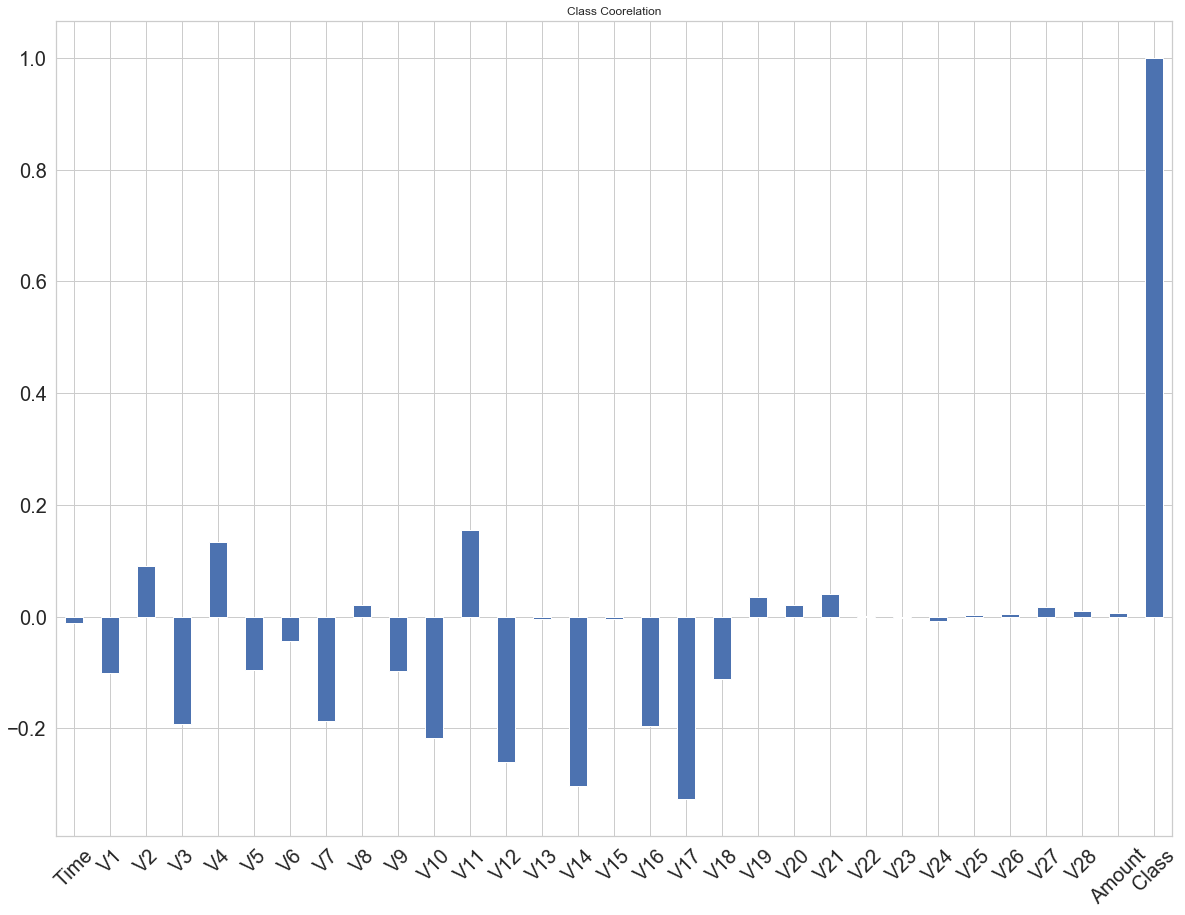

In [8]:
#Looking for Correlation
data.corrwith(data.Class).plot.bar(figsize = (20, 15), title = "Class Coorelation", fontsize = 20, rot = 45, grid = True)

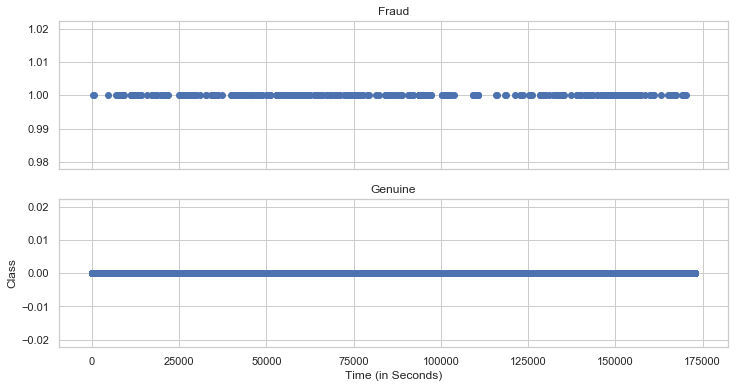

In [9]:
# Plotting Time against Class to see if there is any distribution
f, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
axis1.set_title('Fraud')
axis2.set_title('Genuine')

axis1.scatter(data.Time[data.Class == 1], data.Class[data.Class == 1])
axis2.scatter(data.Time[data.Class == 0], data.Class[data.Class == 0])

plt.xlabel('Time (in Seconds)')
plt.ylabel('Class')
plt.show()

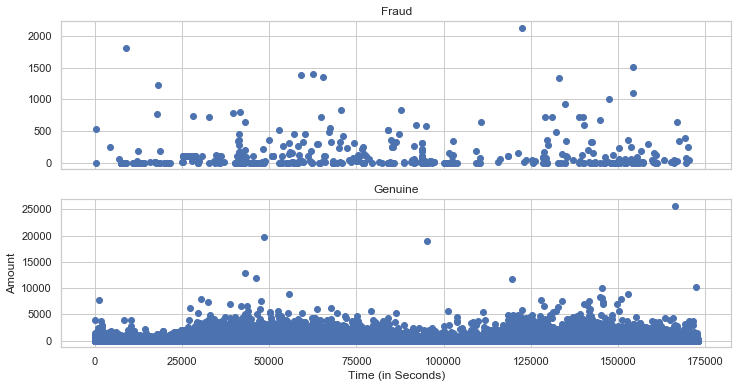

In [10]:
# Plotting Time against Amount to see if there is any distribution
f, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
axis1.set_title('Fraud')
axis2.set_title('Genuine')

axis1.scatter(data.Time[data.Class == 1], data.Amount[data.Class == 1])
axis2.scatter(data.Time[data.Class == 0], data.Amount[data.Class == 0])

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [11]:
# The time column shows the time elapsed from the first transaction. Also, there doesn't seem to be 
# anything useful in this distribution between Amount and Time. Given that we don't know when the first
# transaction happened, I am dropping this column. 
data = data.drop(['Time'], axis=1)

In [12]:
#Normalizing the Amount
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)

In [13]:
# Computing the correlation matrix
correlation = data.corr()
correlation.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
V26,-8.621897e-17,2.601622e-16,6.521501e-16,-6.179751e-16,9.144690e-16,-2.378414e-16,-7.334507e-16,-1.209975e-16,-1.388725e-15,-2.554293e-16,...,-4.907301e-16,-8.477050e-16,8.848700e-16,3.129195e-16,2.810884e-15,1.000000e+00,-3.383861e-16,-3.751403e-16,0.004455,-0.003208
V27,3.208233e-17,-4.478472e-16,6.239832e-16,-6.403423e-17,4.465960e-16,-2.623818e-16,-5.886825e-16,1.733633e-16,-2.287414e-16,-3.103239e-16,...,-1.033403e-15,-1.294910e-16,5.524044e-16,-3.736529e-16,-6.107118e-16,-3.383861e-16,1.000000e+00,-3.770124e-16,0.017580,0.028825
V28,9.820892e-16,-3.676415e-16,7.726948e-16,-5.863664e-17,-3.299167e-16,4.813155e-16,-6.836764e-17,-4.484325e-16,9.146779e-16,-1.515934e-16,...,5.132234e-16,-3.021376e-16,9.029821e-16,-2.259275e-16,3.399375e-16,-3.751403e-16,-3.770124e-16,1.000000e+00,0.009536,0.010258
Class,-1.013473e-01,9.128865e-02,-1.929608e-01,1.334475e-01,-9.497430e-02,-4.364316e-02,-1.872566e-01,1.987512e-02,-9.773269e-02,-2.168829e-01,...,4.041338e-02,8.053175e-04,-2.685156e-03,-7.220907e-03,3.307706e-03,4.455398e-03,1.757973e-02,9.536041e-03,1.000000,0.005632
normalizedAmount,-2.277087e-01,-5.314089e-01,-2.108805e-01,9.873167e-02,-3.863563e-01,2.159812e-01,3.973113e-01,-1.030791e-01,-4.424560e-02,-1.015021e-01,...,1.059989e-01,-6.480065e-02,-1.126326e-01,5.146217e-03,-4.783686e-02,-3.208037e-03,2.882546e-02,1.025822e-02,0.005632,1.000000


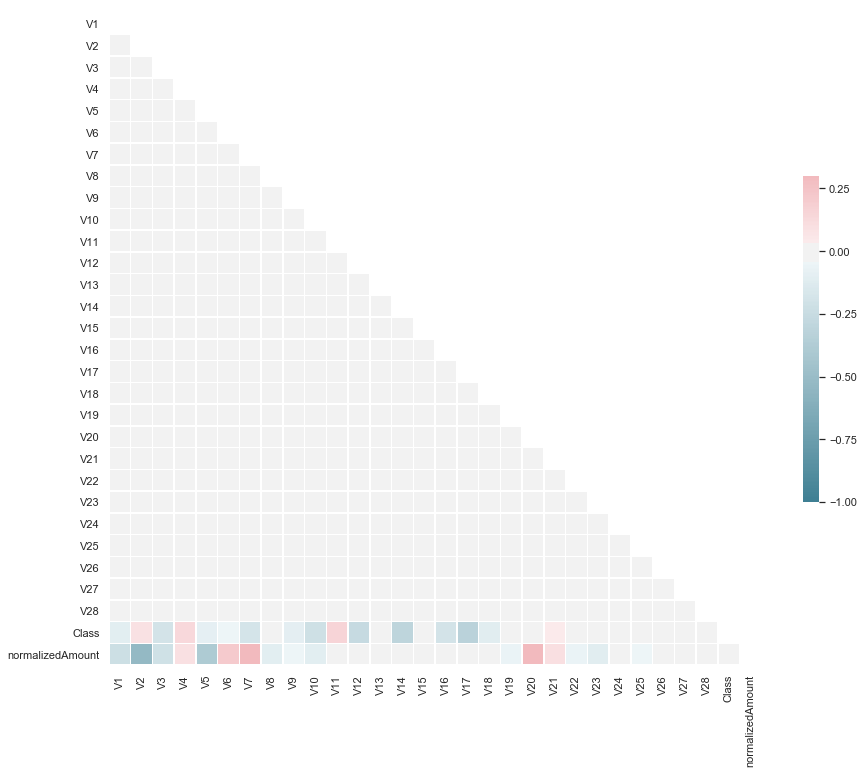

In [14]:
# Code copied from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
# The above code shows that columns V8, V13, V15, V20, V22, V23, V24, V25, V26, V27 & V28 are not having any 
# statistical association with respect to the prediction of the independent variable. (Class)
# So, I am dropping these columns from the dataframe. 

In [16]:
data = data.drop(['V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'], axis =1)

In [17]:
data.shape

(284807, 19)

# Building the RandomForest Model

In [18]:
# Splitting the data into dependent and independent variables
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [19]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [20]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,-0.073403


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=7)

In [22]:
X_train.shape

(199364, 18)

In [23]:
X_test.shape

(85443, 18)

In [24]:
#Converting all the values to np arrays and using .ravel() where required
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
random_forest = RandomForestClassifier(n_estimators=50)

In [26]:
random_forest.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y_pred = random_forest.predict(X_test)

In [28]:
random_forest.score(X_test,y_test)

0.9995669627705019

In [29]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [30]:
# Sensitivity = True Positives / (True Positives + False Negatives)
# Specificity = True Negatives / (True Negatives + False Positives)

def getScores (cnf_matrix):
    Accuracy = ((cnf_matrix[0][0] + cnf_matrix[1][1]) / cnf_matrix.sum()) *100
    Error_rate = ((cnf_matrix[0][1] + cnf_matrix[1][0]) / cnf_matrix.sum()) *100
    Specificity = (cnf_matrix[1][1] / (cnf_matrix[1][1] + cnf_matrix[0][1])) *100
    Sensitivity = (cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[1][0])) *100
    return Accuracy, Error_rate, Specificity, Sensitivity

accuracy, error_rate, specificity, sensitivity = getScores(cnf_matrix)

In [31]:
# Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# Specific version: https://scikit-learn.org/0.19/_downloads/plot_confusion_matrix.py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85279     9]
 [   28   127]]


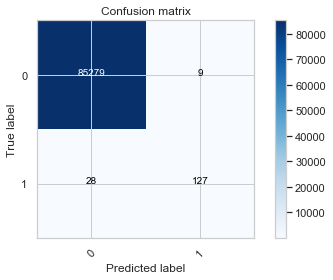

In [32]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.93      0.82      0.87       155

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



AUC Score: 0.957


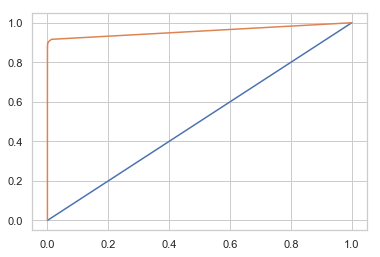

In [34]:
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# Plotting the AUC Curve

prob = random_forest.predict_proba(X_test)
prob = prob[:, 1]

auc = roc_auc_score(y_test, prob)    
print('AUC Score: %.3f' % auc)
results = pd.DataFrame([['Random Forest - Test Data (n=100)', accuracy, error_rate, specificity, sensitivity, auc]],
               columns = ['Model', 'Accuracy', 'Error Rate', 'Specificity', 'Sensitivity', 'AUC Score'])
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
# show the plot
plt.show()

Confusion matrix, without normalization
[[284306      9]
 [    29    463]]


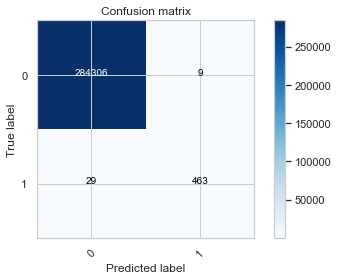

In [35]:
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
accuracy, error_rate, specificity, sensitivity = getScores(cnf_matrix)
plt.show()

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.98      0.94      0.96       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.99      0.97      0.98    284807
weighted avg       1.00      1.00      1.00    284807



AUC Score: 0.987


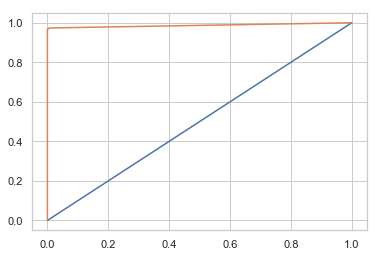

In [37]:
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# Plotting the AUC Curve

prob = random_forest.predict_proba(X)
prob = prob[:, 1]
auc = roc_auc_score(y, prob)
print('AUC Score: %.3f' % auc)
modelResults = pd.DataFrame([['Random Forest - Complete Data (n=100)', accuracy, error_rate, specificity, sensitivity, auc]],
               columns = ['Model', 'Accuracy', 'Error Rate', 'Specificity', 'Sensitivity', 'AUC Score'])
results = results.append(modelResults, ignore_index = True)
fpr, tpr, thresholds = roc_curve(y, prob)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
# show the plot
plt.show()

## Deep Learning Model

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [39]:
# input_dim is 18 and not 29 as I dropped the columns which weren't affecting the independent variable. 
model = Sequential()

model.add(Dense(units=8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 152       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                216       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24)                96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                800       
_________________________________________________________________
batch_normalization_2

Instructions for updating:
Use tf.cast instead.
Train on 199364 samples, validate on 85443 samples
Epoch 1/50
199364/199364 [==============================] - 30s 150us/step - loss: 0.0435 - acc: 0.9840 - val_loss: 0.0043 - val_acc: 0.9995
Epoch 2/50
199364/199364 [==============================] - 34s 171us/step - loss: 0.0055 - acc: 0.9990 - val_loss: 0.0040 - val_acc: 0.9994
Epoch 3/50
199364/199364 [==============================] - 45s 227us/step - loss: 0.0048 - acc: 0.9991 - val_loss: 0.0035 - val_acc: 0.9994
Epoch 4/50
199364/199364 [==============================] - 42s 212us/step - loss: 0.0044 - acc: 0.9991 - val_loss: 0.0030 - val_acc: 0.9994: 0s - loss: 0.00
Epoch 5/50
199364/199364 [==============================] - 48s 239us/step - loss: 0.0042 - acc: 0.9992 - val_loss: 0.0041 - val_acc: 0.9993
Epoch 6/50
199364/199364 [==============================] - 45s 227us/step - loss: 0.0041 - acc: 0.9992 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 7/50
199364/199364 [============

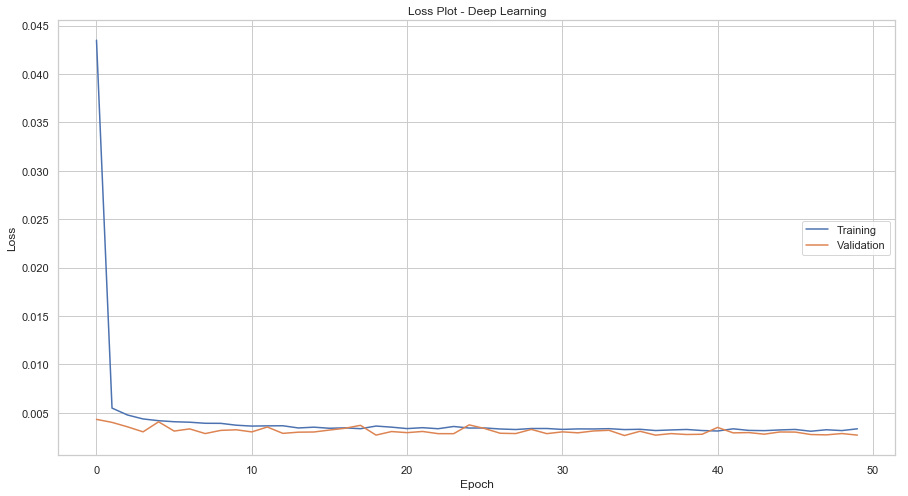

In [40]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
#model.fit(X_train, y_train, batch_size = 32, epochs = 50)

trainingHistory = model.fit(X_train, y_train,
                    batch_size=64, epochs=50,
                    verbose=1, validation_data=(X_test, y_test))

loss = trainingHistory.history['loss']
val_loss = trainingHistory.history['val_loss']
# Plot the loss function
plt.figure(figsize=(15,8))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss Plot - Deep Learning')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right');

In [41]:
evaluationResult = model.evaluate(X_test, y_test)
print(evaluationResult)

85443/85443 [==============================] - 3s 37us/step
[0.0026826180223236793, 0.9994382219725431]


Confusion matrix, without normalization
[[85270    18]
 [   30   125]]


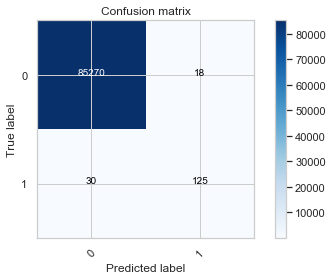

AUC Score: 0.982


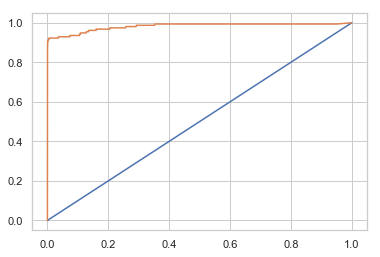

In [42]:
#Predicting and Plotting
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

cnf_matrix = confusion_matrix(y_test, y_pred.round())

plot_confusion_matrix(cnf_matrix,classes=[0,1])
accuracy, error_rate, specificity, sensitivity = getScores(cnf_matrix)
plt.show()

prob = model.predict_proba(X_test)
prob = prob[:, 0]
auc = roc_auc_score(y_test, prob)
print('AUC Score: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
# show the plot
plt.show()
modelResults = pd.DataFrame([['Deep Learning Model - Test Data', accuracy, error_rate, specificity, sensitivity, auc]],
               columns = ['Model', 'Accuracy', 'Error Rate', 'Specificity', 'Sensitivity', 'AUC Score'])
results = results.append(modelResults, ignore_index = True)

Confusion matrix, without normalization
[[284259     56]
 [   111    381]]


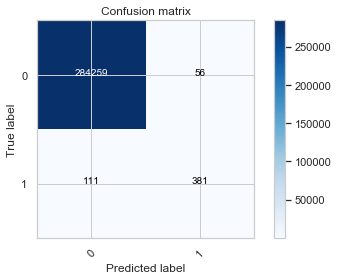

AUC Score: 0.988


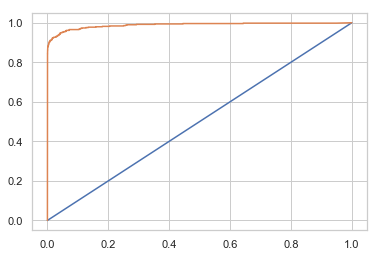

In [43]:
# Predicting for the entire set
y_pred = model.predict(X)
y_test = pd.DataFrame(y)

cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
accuracy, error_rate, specificity, sensitivity = getScores(cnf_matrix)
plt.show()

prob = model.predict_proba(X)
prob = prob[:, 0]
auc = roc_auc_score(y_test, prob)
print('AUC Score: %.3f' % auc)
modelResults = pd.DataFrame([['Deep Learning Model - Complete Data', accuracy, error_rate, specificity, sensitivity, auc]],
               columns = ['Model', 'Accuracy', 'Error Rate', 'Specificity', 'Sensitivity', 'AUC Score'])
results = results.append(modelResults, ignore_index = True)
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
# show the plot
plt.show()

## Smote

In [44]:
# https://www.kaggle.com/sid321axn/fraud-detection-deep-learning-with-smote
# !pip install -U imbalanced-learn

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [47]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)
X_resample.shape

(568630, 18)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [49]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Train on 398041 samples, validate on 170589 samples
Epoch 1/50
398041/398041 [==============================] - 34s 85us/step - loss: 0.1486 - acc: 0.9451 - val_loss: 0.0670 - val_acc: 0.9739
Epoch 2/50
398041/398041 [==============================] - 30s 76us/step - loss: 0.0727 - acc: 0.9710 - val_loss: 0.0518 - val_acc: 0.9804
Epoch 3/50
398041/398041 [==============================] - 32s 81us/step - loss: 0.0605 - acc: 0.9761 - val_loss: 0.0474 - val_acc: 0.9818
Epoch 4/50
398041/398041 [==============================] - 32s 80us/step - loss: 0.0562 - acc: 0.9782 - val_loss: 0.0437 - val_acc: 0.9843
Epoch 5/50
398041/398041 [==============================] - 33s 84us/step - loss: 0.0528 - acc: 0.9798 - val_loss: 0.0411 - val_acc: 0.9853
Epoch 6/50
398041/398041 [==============================] - 34s 87us/step - loss: 0.0513 - acc: 0.9806 - val_loss: 0.0411 - val_acc: 0.9854
Epoch 7/50
398041/398041 [==============================] - 36s 91us/step - loss: 0.0497 - acc: 0.9812 - val

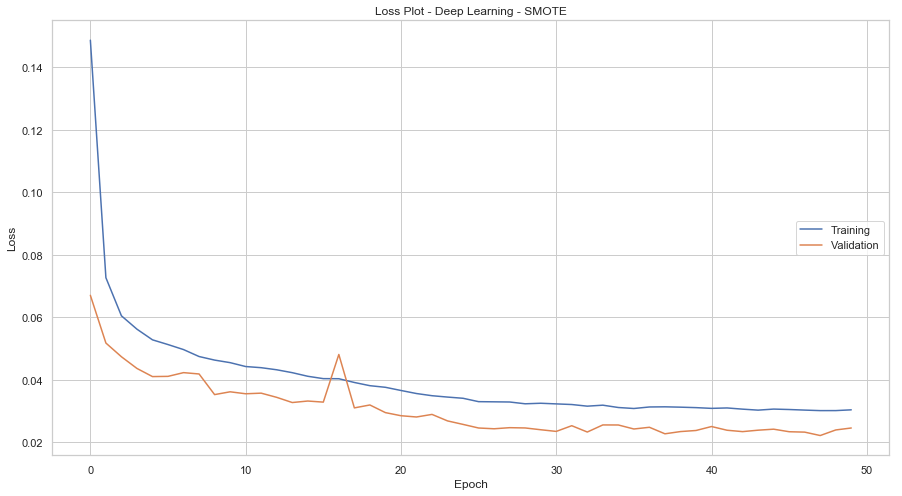

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(X_train,y_train,batch_size=32,epochs=50)
trainingHistory = model.fit(X_train, y_train,
                    batch_size=64, epochs=50,
                    verbose=1, validation_data=(X_test, y_test))
loss = trainingHistory.history['loss']
val_loss = trainingHistory.history['val_loss']
# Plot the loss function
plt.figure(figsize=(15,8))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss Plot - Deep Learning - SMOTE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right');

In [51]:
evaluationResult = model.evaluate(X_test, y_test)
print(evaluationResult)

170589/170589 [==============================] - 8s 44us/step
[0.024620377015872427, 0.9928072736225665]


Confusion matrix, without normalization
[[83939  1160]
 [   67 85423]]


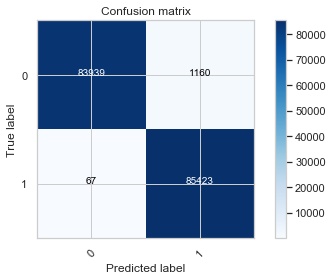

AUC Score: 0.999


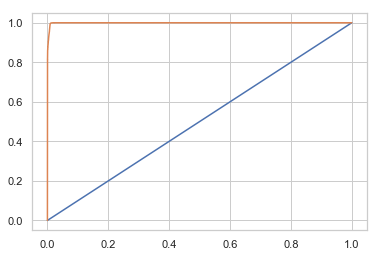

In [52]:
# Predicting for the test set
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
accuracy, error_rate, specificity, sensitivity = getScores(cnf_matrix)
plt.show()
prob = model.predict_proba(X_test)
prob = prob[:, 0]
auc = roc_auc_score(y_test, prob)
print('AUC Score: %.3f' % auc)
modelResults = pd.DataFrame([['DL Model - Using SMOTE - Test Data', accuracy, error_rate, specificity, sensitivity, auc]],
               columns = ['Model', 'Accuracy', 'Error Rate', 'Specificity', 'Sensitivity', 'AUC Score'])
results = results.append(modelResults, ignore_index = True)

fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
# show the plot
plt.show()

Confusion matrix, without normalization
[[280449   3866]
 [   211 284104]]


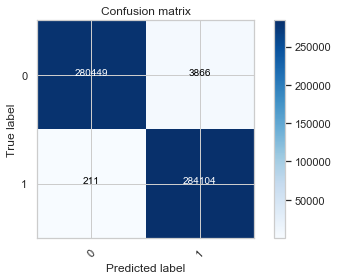

AUC Score: 0.999


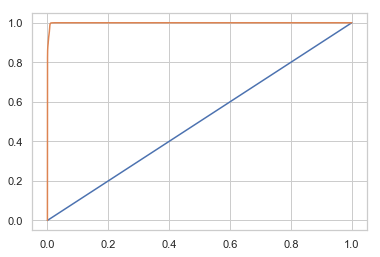

In [53]:
# Predicting for the entire set
y_pred = model.predict(X_resample)
y_test = pd.DataFrame(y_resample)

cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
accuracy, error_rate, specificity, sensitivity = getScores(cnf_matrix)
plt.show()
prob = model.predict_proba(X_resample)
prob = prob[:, 0]
auc = roc_auc_score(y_test, prob)
print('AUC Score: %.3f' % auc)
modelResults = pd.DataFrame([['DL Model - Using SMOTE - Complete Data', accuracy, error_rate, specificity, sensitivity, auc]],
               columns = ['Model', 'Accuracy', 'Error Rate', 'Specificity', 'Sensitivity', 'AUC Score'])
results = results.append(modelResults, ignore_index = True)

fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
# show the plot
plt.show()

## Using ADASYN

In [54]:
#!pip install -U imbalanced-learn

In [55]:
from imblearn.over_sampling import ADASYN

In [56]:
X_resample, y_resample = ADASYN().fit_sample(X,y.values.ravel())

In [57]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)
X_resample.shape

(568613, 18)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [59]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Train on 398029 samples, validate on 170584 samples
Epoch 1/50
398029/398029 [==============================] - 34s 87us/step - loss: 0.0458 - acc: 0.9881 - val_loss: 0.0331 - val_acc: 0.9923
Epoch 2/50
398029/398029 [==============================] - 32s 80us/step - loss: 0.0428 - acc: 0.9889 - val_loss: 0.0368 - val_acc: 0.9904
Epoch 3/50
398029/398029 [==============================] - 33s 83us/step - loss: 0.0431 - acc: 0.9888 - val_loss: 0.0316 - val_acc: 0.9925
Epoch 4/50
398029/398029 [==============================] - 33s 82us/step - loss: 0.0435 - acc: 0.9889 - val_loss: 0.0317 - val_acc: 0.9926
Epoch 5/50
398029/398029 [==============================] - 31s 78us/step - loss: 0.0423 - acc: 0.9891 - val_loss: 0.0328 - val_acc: 0.9922
Epoch 6/50
398029/398029 [==============================] - 30s 76us/step - loss: 0.0431 - acc: 0.9890 - val_loss: 0.0316 - val_acc: 0.9926
Epoch 7/50
398029/398029 [==============================] - 30s 75us/step - loss: 0.0432 - acc: 0.9889 - val

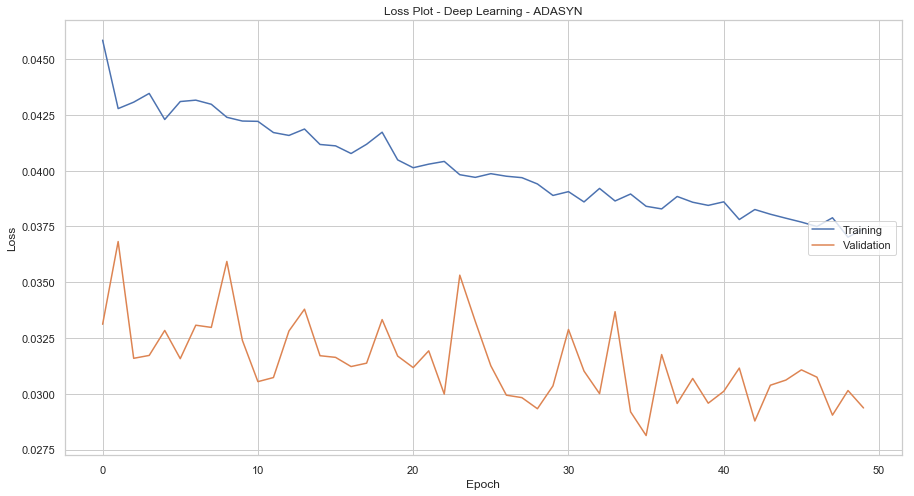

In [60]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(X_train,y_train,batch_size=32,epochs=50)
trainingHistory = model.fit(X_train, y_train,
                    batch_size=64, epochs=50,
                    verbose=1, validation_data=(X_test, y_test))
loss = trainingHistory.history['loss']
val_loss = trainingHistory.history['val_loss']
# Plot the loss function
plt.figure(figsize=(15,8))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss Plot - Deep Learning - ADASYN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='right');

In [61]:
evaluationResult = model.evaluate(X_test, y_test)
print(evaluationResult)

170584/170584 [==============================] - 21s 126us/step
[0.029368039215941767, 0.9931822445246916]


Confusion matrix, without normalization
[[84107  1077]
 [   86 85314]]


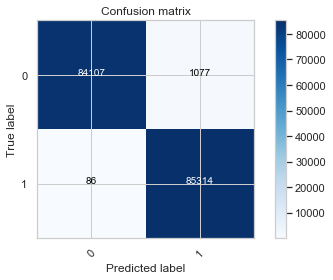

AUC Score: 0.998


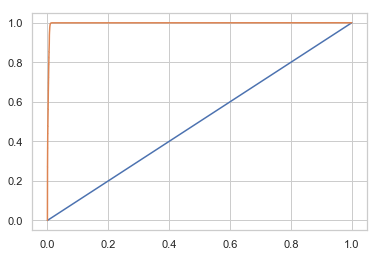

In [62]:
# Predicting for the test set
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
accuracy, error_rate, specificity, sensitivity = getScores(cnf_matrix)
plt.show()
prob = model.predict_proba(X_test)
prob = prob[:, 0]
auc = roc_auc_score(y_test, prob)
print('AUC Score: %.3f' % auc)
modelResults = pd.DataFrame([['DL Model - Using ADASYN - Test Data', accuracy, error_rate, specificity, sensitivity, auc]],
               columns = ['Model', 'Accuracy', 'Error Rate', 'Specificity', 'Sensitivity', 'AUC Score'])
results = results.append(modelResults, ignore_index = True)

fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
# show the plot
plt.show()

Confusion matrix, without normalization
[[280730   3585]
 [   317 283981]]


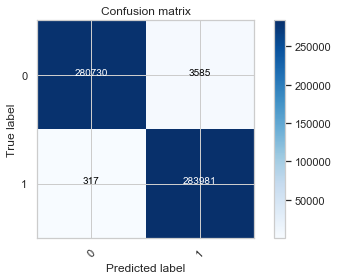

AUC Score: 0.998


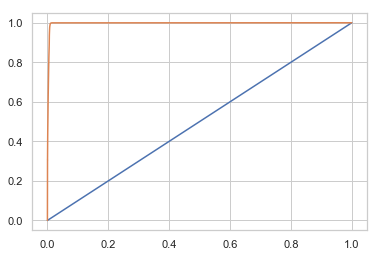

In [63]:
# Predicting for the entire set
y_pred = model.predict(X_resample)
y_test = pd.DataFrame(y_resample)

cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
accuracy, error_rate, specificity, sensitivity = getScores(cnf_matrix)
plt.show()
prob = model.predict_proba(X_resample)
prob = prob[:, 0]
auc = roc_auc_score(y_test, prob)
print('AUC Score: %.3f' % auc)
modelResults = pd.DataFrame([['DL Model - Using ADASYN - Complete Data', accuracy, error_rate, specificity, sensitivity, auc]],
               columns = ['Model', 'Accuracy', 'Error Rate', 'Specificity', 'Sensitivity', 'AUC Score'])
results = results.append(modelResults, ignore_index = True)

fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
# show the plot
plt.show()

In [64]:
results

,Model,Accuracy,Error Rate,Specificity,Sensitivity,AUC Score
0,Random Forest - Test Data (n=100),99.956696,0.043304,93.382353,99.967177,0.957357
1,Random Forest - Complete Data (n=100),99.986658,0.013342,98.093220,99.989801,0.986651
2,Deep Learning Model - Test Data,99.943822,0.056178,87.412587,99.964830,0.981623
3,Deep Learning Model - Complete Data,99.941364,0.058636,87.185355,99.960966,0.988126
4,DL Model - Using SMOTE - Test Data,99.280727,0.719273,98.660245,99.920244,0.999195
5,DL Model - Using SMOTE - Complete Data,99.283014,0.716986,98.657499,99.924820,0.999247
6,DL Model - Using ADASYN - Test Data,99.318224,0.681776,98.753342,99.897854,0.997596
7,DL Model - Using ADASYN - Complete Data,99.313769,0.686231,98.753330,99.887207,0.997702
